<a href="https://colab.research.google.com/github/akshays1212/dm_assignment/blob/main/rnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [2]:
CSV_PATH = "/content/drive/MyDrive/airline_passengers.csv"

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [4]:
df = pd.read_csv(CSV_PATH)
print("First 5 rows:")
display(df.head())

First 5 rows:


,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


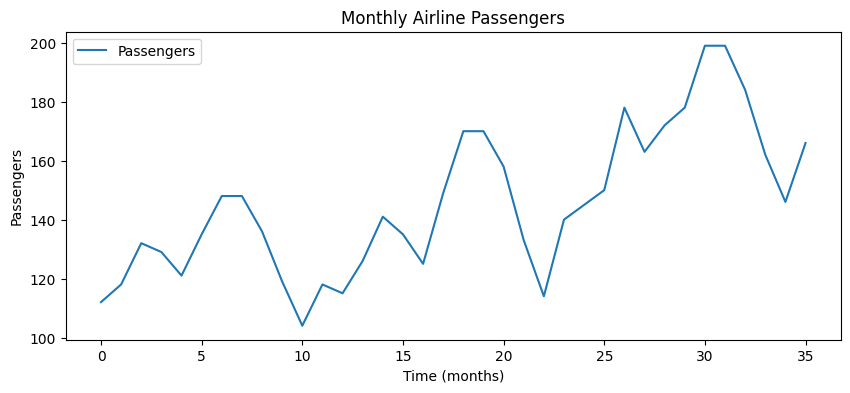

In [5]:
data = df["Passengers"].values.reshape(-1,1)
plt.figure(figsize=(10,4))
plt.plot(data, label='Passengers')
plt.title("Monthly Airline Passengers")
plt.xlabel("Time (months)")
plt.ylabel("Passengers")
plt.legend()
plt.show()

In [6]:
# 2. Normalize data
scaler = MinMaxScaler(feature_range=(0,1))
scaled = scaler.fit_transform(data)

In [7]:
# 3. Create sequences (look_back = 10 months)
def create_dataset(series, look_back=10):
    X, y = [], []
    for i in range(len(series)-look_back):
        X.append(series[i:i+look_back, 0])
        y.append(series[i+look_back, 0])
    return np.array(X), np.array(y)

look_back = 10
X, y = create_dataset(scaled, look_back)
X = X.reshape((X.shape[0], look_back, 1))  # (samples, timesteps, features)

In [8]:
# 4. Split train/test
split = int(len(X)*0.67)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [9]:
# 5. Build simple Vanilla RNN
model = keras.Sequential([
    layers.SimpleRNN(16, input_shape=(look_back,1), activation="tanh"),
    layers.Dense(1)
])
model.compile(optimizer="adam", loss="mse")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
# 6. Train
history = model.fit(X_train, y_train, epochs=20, batch_size=8, verbose=1)

Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0889
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0632
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0604
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0593
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0591
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0604
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0493
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0442
Epoch 9/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0409
Epoch 10/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0339
Epoch 11/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0413
Epoch 12/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0399
Epoch 13/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0397
Epoch 14/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0342
Epoch 15/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0310
Epoch 16/20
3/3 ━━━━━━━━━━━━━━━━━━

In [11]:
# 7. Predict
pred = model.predict(X_test)
pred_rescaled = scaler.inverse_transform(pred)
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1,1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 528ms/step


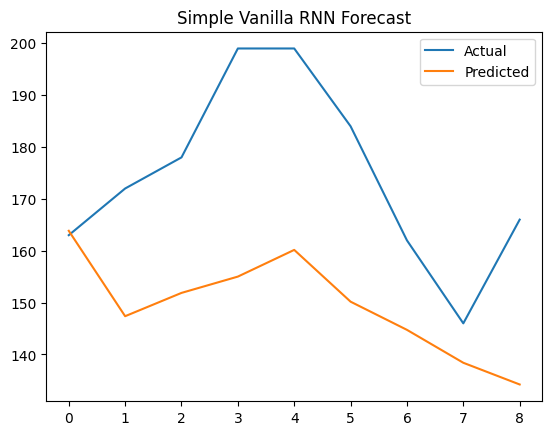

In [12]:
# 8. Plot results
plt.plot(y_test_rescaled, label="Actual")
plt.plot(pred_rescaled, label="Predicted")
plt.title("Simple Vanilla RNN Forecast")
plt.legend()
plt.show()